<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [4]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    8      8  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [1]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false

Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.3s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

Temps moyen newton : 0.014426767826080322
Temps moyen rc + cauchy : 0.018033504486083984


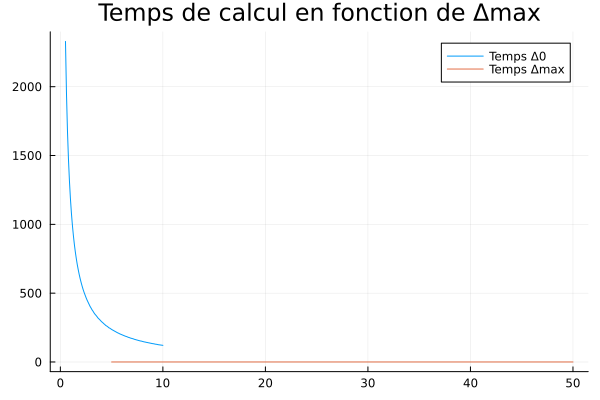

In [114]:
### 1 ###
# f1 = 2(x1² + x2² + x3² + 2*x1x2 + 2*x2x3 + 2*x1x3 -6(x1+x2+x3)) + x1² + x2² -2x1x2 + x2² + x3² -2x2x3
# f1 = modèle de taylor à l'ordre 2 car quadratique

include("../src/newton.jl")
include("../src/regions_de_confiance.jl")
include("../test/fonctions_de_tests.jl")
using Plots

# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots

t_newton = []
t_rc_cauchy = []
for x0 in [pts1.x011, pts1.x012, pts2.x01, pts2.x02]
    t = time()
    _ = newton(fct1, grad_fct1, hess_fct1, x0)
    t_newton = vcat(t_newton, [time()-t])

    t = time()
    _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, algo_pas = "cauchy")
    t_rc_cauchy = vcat(t_rc_cauchy, [time()-t])
end

println("Temps moyen newton : ", sum(t_newton)/length(t_newton))
println("Temps moyen rc + cauchy : ", sum(t_rc_cauchy)/length(t_rc_cauchy))

# Newton est plus rapide que RC + Cauchy, c'est normal car Cauchy s'appuie sur l'approximation de f1 en une fonction quadratique et ici elle estr déjà quadratique

### 2 ###
# Pour influencer la vitesse de convergence on peut aussi changer γ1, γ2, η1, η2 pour changer différemment la modification de la région de confiance
# En particulier cela peut dépendre de la fonction étudiée

t_Δ0 = []
t_Δmax = []
x0 = [10000,2,2]
erreur = false
_ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, Δ0 = 0.5, algo_pas = "cauchy")
val_Δ0 = range(0.5,10,100)
val_Δmax = range(5,50,100)
for Δ0 in val_Δ0
    t = time()
    _, _, flag, nb_iters, _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, Δ0 = Δ0, Δmax = Δ0*10 , algo_pas = "cauchy")
    if flag == 3
        erreur = true
    end
    t_Δ0 = vcat(t_Δ0, [nb_iters])
end
for Δmax in val_Δmax
    t = time()
    _, _, flag, nb_iters, _ = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0, Δmax = Δmax, algo_pas = "cauchy")
    if flag == 3
        erreur = true
    end
    t_Δmax = vcat(t_Δmax, [time()-t])
end
if erreur
    println("Non convergence")
else
    plot(val_Δ0, t_Δ0,label = "Temps Δ0", plot_title="Temps de calcul en fonction de Δ0")
    #plot(val_Δmax, t_Δmax, label = "Temps Δmax", plot_title="Temps de calcul en fonction de Δmax")
end


# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [ ]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [ ]:
include("../src/regions_de_confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

In [ ]:
# Expérimentations numériques à faire ici.
# Vous pouvez utiliser le package Plots pour les affichages de courbes: using Plots